In [1]:
import set_mygulp_vars
import numpy as np
import re
import os
from ase.build import make_supercell
from ase.io import Trajectory
from ase.build import cut
from os import remove
from ase.spacegroup import crystal
from ase.visualize import view
from ase.calculators.gulp import GULP

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
T_list_A = np.linspace(100,1001,100)
V_list_A = [599.182534,
 599.308094,
 599.463648,
 599.582759,
 599.715147,
 599.83284,
 599.990635,
 600.174109,
 600.307681,
 600.401513,
 600.527606,
 600.711618,
 600.91019,
 601.068074,
 601.169974,
 601.245387,
 601.340222,
 601.486269,
 601.687443,
 601.923711,
 602.164295,
 602.380991,
 602.556656,
 602.687887,
 602.782809,
 602.856387,
 602.925373,
 603.004241,
 603.102684,
 603.224811,
 603.36967,
 603.532595,
 603.70679,
 603.884961,
 604.060471,
 604.228266,
 604.385256,
 604.530309,
 604.664113,
 604.788722,
 604.907093,
 605.022597,
 605.138577,
 605.257992,
 605.383185,
 605.515746,
 605.656453,
 605.805318,
 605.961684,
 606.124379,
 606.291838,
 606.462274,
 606.633847,
 606.804769,
 606.973423,
 607.138483,
 607.298882,
 607.453946,
 607.603324,
 607.746989,
 607.885238,
 608.018612,
 608.147862,
 608.273912,
 608.397765,
 608.520467,
 608.643065,
 608.766565,
 608.891866,
 609.019766,
 609.15094,
 609.285878,
 609.424917,
 609.568317,
 609.716154,
 609.868339,
 610.024607,
 610.184673,
 610.348181,
 610.514655,
 610.683546,
 610.854298,
 611.026319,
 611.198995,
 611.371698,
 611.543898,
 611.714955,
 611.884334,
 612.05151,
 612.216023,
 612.377446,
 612.535419,
 612.689631,
 612.839859,
 612.985941,
 613.127789,
 613.265415,
 613.398906,
 613.528385,
 613.654109]
T_list_B = np.linspace(1000,4001,50)
V_list_B = [613.640469,
 614.421907,
 615.220224,
 616.244907,
 617.603006,
 619.175444,
 620.686511,
 621.934072,
 622.998341,
 624.074933,
 625.045744,
 626.28653,
 627.693711,
 628.934322,
 629.870328,
 631.155005,
 633.265549,
 635.044818,
 634.521251,
 636.279156,
 637.75507,
 636.440832,
 638.514491,
 640.512038,
 641.733394,
 643.705035,
 645.504739,
 651.007749,
 650.213048,
 657.686868,
 658.028863,
 655.226079,
 655.964292,
 657.561347,
 661.933242,
 664.099051,
 664.442618,
 663.360351,
 670.966562,
 670.322569,
 672.381735,
 671.152901,
 673.17788,
 676.028598,
 675.225953,
 682.928935,
 680.247563,
 689.178833,
 688.456367,
 682.447222]

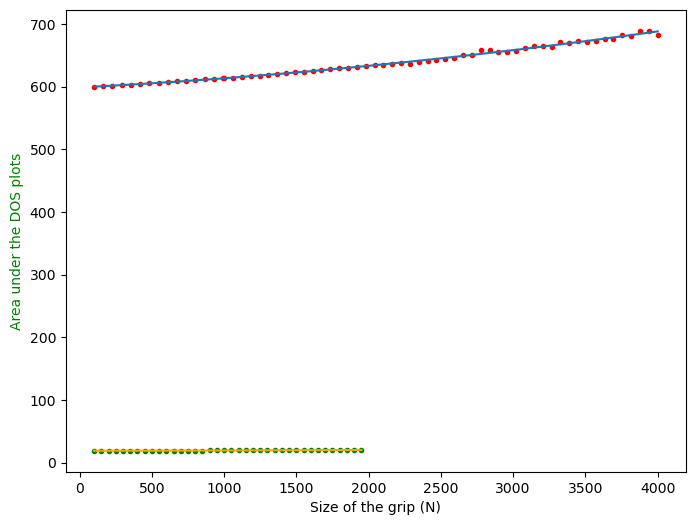

In [118]:
MD_V = np.array(V_list_A[::7]+V_list_B)
MD_T = np.concatenate((T_list_A[::7],T_list_B))
LD_T = np.arange(0,2000,50)[2:]
LD_V = [18.836391, 18.836478, 18.838193, 18.844626, 18.856171, 18.871668, 18.890028, 18.910487, 18.932536, 18.955836, 18.980158, 19.005341, 19.0315, 19.058124, 19.085367, 19.113276, 19.14165, 19.170558, 19.199989, 19.229936, 19.2604, 19.291382, 19.322888, 19.355088, 19.390716, 19.420474, 19.454229, 19.488436, 19.524128, 19.5601, 19.595234, 19.63136, 19.671879, 19.707773, 19.747558, 19.787604, 19.828541, 19.870424, 19.913311, 19.957269]
'''LD_V=np.array(LD_V)/18.838193
MD_V = np.array(V_list_A[::7]+V_list_B)/599.182534
'''
LD_V=np.array(LD_V)
LD_V = LD_V[2:]


#LD_V = np.array(LD_V)*4

poly_LD = np.polyfit(LD_T, LD_V, deg=3)
poly_MD = np.polyfit(MD_T, MD_V, deg=3)




plt.rcParams['figure.figsize'] = [8, 6]
fig, ax = plt.subplots()

ax.plot(LD_T, LD_V,color='g',marker='.',linestyle='')
ax.plot(MD_T, MD_V,color='r',marker='.',linestyle='')

ax.plot(MD_T,np.polyval(poly_MD, MD_T), label='fit MD')
ax.plot(LD_T,np.polyval(poly_LD, LD_T), label='fit LD',color='orange')


ax.set_xlabel('Size of the grip (N)')
ax.set_ylabel('Area under the DOS plots', color='g')

plt.show()

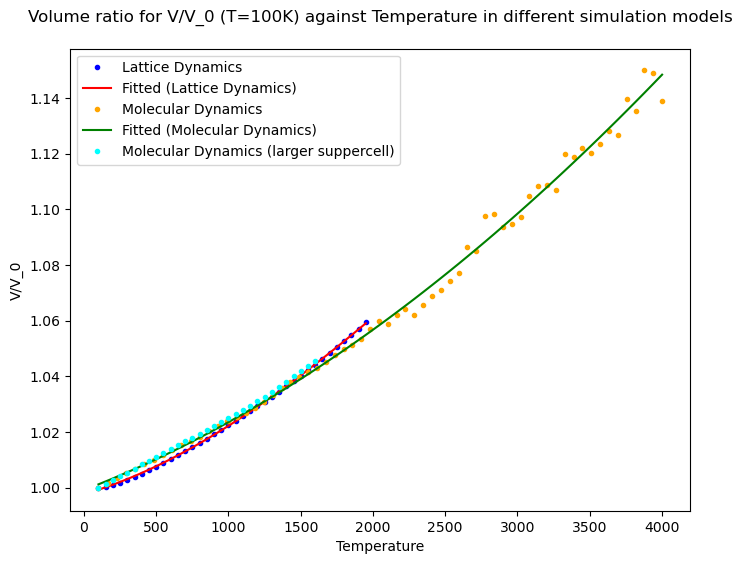

In [176]:
MD_V = np.array(V_list_A[::7]+V_list_B)/599.182534
MD_T = np.concatenate((T_list_A[::7],T_list_B))
LD_T = np.arange(0,2000,50)[2:]
LD_V = [18.836391, 18.836478, 18.838193, 18.844626, 18.856171, 18.871668, 18.890028, 18.910487, 18.932536, 18.955836, 18.980158, 19.005341, 19.0315, 19.058124, 19.085367, 19.113276, 19.14165, 19.170558, 19.199989, 19.229936, 19.2604, 19.291382, 19.322888, 19.355088, 19.390716, 19.420474, 19.454229, 19.488436, 19.524128, 19.5601, 19.595234, 19.63136, 19.671879, 19.707773, 19.747558, 19.787604, 19.828541, 19.870424, 19.913311, 19.957269]
LD_V=np.array(LD_V)/18.838193
LD_V = LD_V[2:]


poly_LD = np.polyfit(LD_T, LD_V, deg=3)
poly_MD = np.polyfit(MD_T, MD_V, deg=3)


plt.rcParams['figure.figsize'] = [8, 6]

plt.title("Volume ratio for V/V_0 (T=100K) against Temperature in different simulation models\n")

plt.plot(LD_T, LD_V,marker='.',linestyle='',label='Lattice Dynamics',color = 'b')
plt.plot(LD_T,np.polyval(poly_LD, LD_T), label='Fitted (Lattice Dynamics)',color = 'r')


plt.plot(MD_T, MD_V,marker='.',linestyle='',label='Molecular Dynamics',color = 'orange')

plt.plot(MD_T,np.polyval(poly_MD, MD_T), label='Fitted (Molecular Dynamics)',color = 'green')
plt.plot(larger_sc_T,larger_sc_V, label='Molecular Dynamics (larger suppercell)',marker='.',linestyle='',color = 'cyan')

plt.xlabel('Temperature')
plt.ylabel('V/V_0')
'''plt.ylim(1,1.06)
plt.xlim(0,2300)'''
plt.legend()
plt.show()

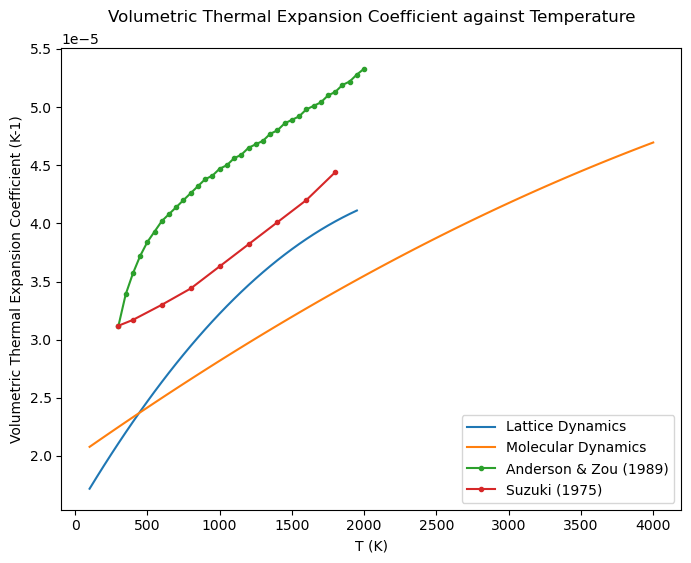

In [139]:
# define the function for gradient calculation
def grad_poly(func,x0,step):
    y0 = np.polyval(func, x0)
    y1 = np.polyval(func,x0+step)
    grad_value = (y1-y0)/(step)
    return grad_value


alpha_list_LD = []
for i in LD_T:
    step_LD = 0.1
    alpha = grad_poly(poly_LD, i, step_LD)/float(np.polyval(poly_LD, i+step_LD))
    alpha_list_LD.append(alpha)

alpha_list_MD = []
for i in MD_T:
    step_MD = step_LD
    alpha = grad_poly(poly_MD, i, step_MD)/float(np.polyval(poly_MD, i+step_MD))
    alpha_list_MD.append(alpha)    
    
    
plt.title("Volumetric Thermal Expansion Coefficient against Temperature\n")

plt.plot(LD_T, alpha_list_LD,label='Lattice Dynamics')
plt.plot(MD_T, alpha_list_MD,label='Molecular Dynamics')
plt.plot(T_list_lit, alpha_list_lit,label='Anderson & Zou (1989)',marker='.',linestyle='-')
plt.plot(Talpha_suzuki, alpha_suzuki_E,label='Suzuki (1975)',marker='.',linestyle='-')

plt.ylabel('Volumetric Thermal Expansion Coefficient (K-1)')
plt.xlabel('T (K)')
plt.legend()
plt.show()   

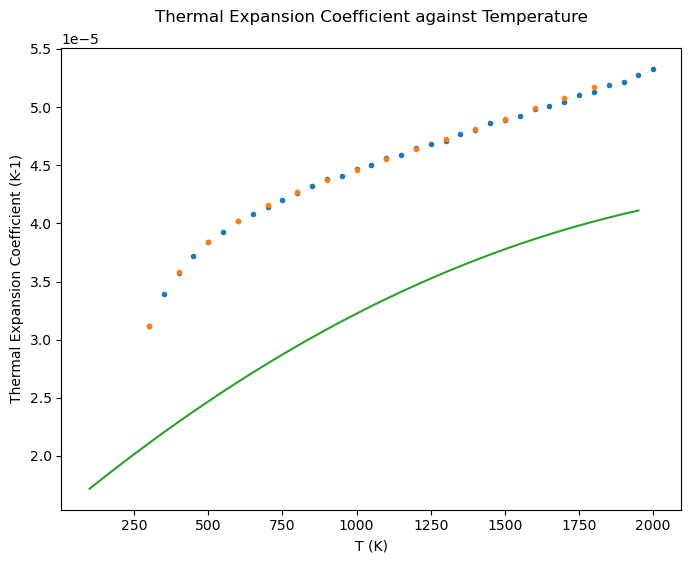

In [125]:
plt.title("Thermal Expansion Coefficient against Temperature\n")

plt.plot(T_list_lit, alpha_list_lit,marker='.',linestyle='')
plt.plot(T_list_lit2[:-3], alpha_lit2_E,marker='.',linestyle='')
plt.plot(LD_T, alpha_list_LD)
plt.ylabel('Thermal Expansion Coefficient (K-1)')
plt.xlabel('T (K)')
plt.show()

In [120]:
slice_01 = 18
print(LD_T[slice_01],alpha_list_LD[slice_01])

slice_02 = 15
print(MD_T[slice_02],alpha_list_MD[slice_02])

slice_03 = 14
print(T_list_lit[slice_03],alpha_list_lit[slice_03])

slice_04 = 7
'''print(T_list_lit2[slice_04],alpha_lit2_E[slice_04])

slice_05 = 7
print(T_list_lit2[slice_05],alpha_lit2_M[slice_05])'''


1000 3.224084468505153e-05
1000.0 2.818420577059426e-05
1000.0 4.47e-05
1000.0 4.4609999999999995e-05
1000.0 4.4659999999999996e-05


In [155]:
slice_06 = 4
print(Talpha_suzuki[slice_06],alpha_suzuki_E[slice_06])

1000.0 3.63e-05


In [72]:
from scipy.interpolate import make_interp_spline, BSpline

#create data
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([4, 9, 12, 30, 45, 88, 140, 230])

#define x as 200 equally spaced values between the min and max of original x 
xnew = np.linspace(x.min(), x.max(), 200) 

#define spline with degree k=7
spl = make_interp_spline(x, y, k=3,t=5)
y_smooth = spl(xnew)

#create smooth line chart 
plt.plot(xnew, y_smooth)
plt.plot(x, y,marker='.',linestyle='')

plt.show()

ValueError: Got 1 knots, need at least 12.

# Literature experiment data

Formulation of the thermodynamic functions for mantle minerals: MgO as an example
Orson L. Anderson & Keshan Zou 

In [100]:
T_list_lit = [300.0,
 350.0,
 400.0,
 450.0,
 500.0,
 550.0,
 600.0,
 650.0,
 700.0,
 750.0,
 800.0,
 850.0,
 900.0,
 950.0,
 1000.0,
 1050.0,
 1100.0,
 1150.0,
 1200.0,
 1250.0,
 1300.0,
 1350.0,
 1400.0,
 1450.0,
 1500.0,
 1550.0,
 1600.0,
 1650.0,
 1700.0,
 1750.0,
 1800.0,
 1850.0,
 1900.0,
 1950.0,
 2000.0]
alpha_list_lit =[31.2,
 33.9,
 35.7,
 37.2,
 38.4,
 39.3,
 40.2,
 40.8,
 41.4,
 42.0,
 42.6,
 43.2,
 43.8,
 44.1,
 44.7,
 45.0,
 45.6,
 45.9,
 46.5,
 46.8,
 47.1,
 47.7,
 48.0,
 48.6,
 48.9,
 49.2,
 49.8,
 50.1,
 50.4,
 51.0,
 51.3,
 51.9,
 52.2,
 52.8,
 53.3]
alpha_list_lit = np.array(alpha_list_lit)*1e-6



# Literature data (repeated)
Thermochemieal and Pressure-Volume-Temperature Systematies
of Data on Solids, Examples: Tungsten and MgO
S.K. Saxena and J. Zhang
Department of Geology, Brooklyn College, Brooklyn, NY 11210, USA and Department of Earth and Environmental Sciences,
Graduate School, CUNY, New York, NY 10036, USA

In [101]:
T_list_lit2 = [300.0,
 400.0,
 500.0,
 600.0,
 700.0,
 800.0,
 900.0,
 1000.0,
 1100.0,
 1200.0,
 1300.0,
 1400.0,
 1500.0,
 1600.0,
 1700.0,
 1800.0,
 2000.0,
 2500.0,
 3000.0]
alpha_lit2_E = [31.2,
 35.8,
 38.4,
 40.21,
 41.59,
 42.71,
 43.69,
 44.61,
 45.5,
 46.37,
 47.23,
 48.1,
 48.99,
 49.9,
 50.81,
 51.69]
alpha_lit2_M = [31.24,
 35.82,
 38.36,
 40.11,
 41.48,
 42.64,
 43.69,
 44.66,
 45.59,
 46.48,
 47.35,
 48.21,
 49.05,
 49.88,
 50.71,
 51.53,
 53.16,
 57.18,
 61.17]
alpha_lit2_M = np.array(alpha_lit2_M)*1e-6
alpha_lit2_E = np.array(alpha_lit2_E)*1e-6

# listerature data
SUZUKI, Isao (1975). Thermal expansion of periclase and olivine, and their anharmonic properties.. Journal of Physics of the Earth, 23(2), 145–159.

In [132]:
T_suzuki = [300.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0, 1100.0, 1200.0, 1300.0, 1400.0, 1500.0, 1600.0, 1700.0, 1800.0]
V_ratio_suzuki_E = [1.0, 1.0034, 1.0073, 1.0113, 1.0152, 1.0196, 1.024, 1.0284, 1.0331, 1.0379, 1.0428, 1.0486, 1.0529, 1.0582, 1.0635, 1.0689]

Talpha_suzuki = [300.0, 400.0,  600.0, 800.0,  1000.0,  1200.0,  1400.0,  1600.0,  1800.0]
alpha_suzuki_E = [3.12, 3.17,  3.3,  3.44,  3.63, 3.82,  4.01,  4.2,  4.44]


alpha_suzuki_E=np.array(alpha_suzuki_E)*1e-5

# lager supercell for volume

In [162]:
larger_sc_T = [100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 400.0, 450.0, 500.0, 550.0, 600.0, 650.0, 700.0, 750.0, 800.0, 850.0, 900.0, 950.0, 1000.0, 1050.0, 1100.0, 1150.0, 1200.0, 1250.0, 1300.0, 1350.0, 1400.0, 1450.0, 1500.0, 1550.0, 1600.0]


larger_sc_V = np.array([4794.472193, 4801.009697, 4807.393505, 4813.917, 4820.086308, 4827.446869, 4834.808759, 4840.785619, 4846.732529, 4853.538171, 4860.891787, 4868.033659, 4874.568724, 4880.694941, 4886.875811, 4893.441675, 4900.434598, 4907.683782, 4914.958275, 4922.087497, 4929.032866, 4935.918595, 4942.998905, 4950.534971, 4958.672069, 4967.442096, 4976.744141, 4986.207079, 4995.3319, 5003.899505, 5011.897474])
larger_sc_V = larger_sc_V/4794.472193